### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import pandas as pd
from sqlalchemy import text
from sqlalchemy import create_engine


import os
from config import db_login_role,db_pass,db_host,db_port,db_name
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [2]:
#Setting connection string for postgreSql
con_string = f'postgresql://{db_login_role}:{db_pass}@{db_host}:{db_port}/{db_name}'

In [3]:
#Create engine to connect to db_name
engine = create_engine(con_string)

with engine.connect() as connection:
    employees_df = pd.read_sql_table('employees',con=engine)
    print(employees_df.info())
    
    salaries_df = pd.read_sql_table('salaries',con=engine)
    print(salaries_df.info())
    
    salaries_1000_df = pd.read_sql_table('salaries_1000',con=engine)
    print(salaries_1000_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      300024 non-null  object        
 1   title_id    300024 non-null  object        
 2   birth_date  300024 non-null  datetime64[ns]
 3   first_name  300024 non-null  object        
 4   last_name   300024 non-null  object        
 5   sex         300024 non-null  object        
 6   hire_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 16.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   emp_no  300024 non-null  object 
 1   salary  300024 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0

# Create a histogram to visualize the most common salary ranges for employees

In [4]:
salary_col = salaries_df["salary"]
salary_col

0         60117.0
1         65828.0
2         40006.0
3         40054.0
4         78228.0
           ...   
300019    40000.0
300020    58058.0
300021    49597.0
300022    40000.0
300023    63707.0
Name: salary, Length: 300024, dtype: float64

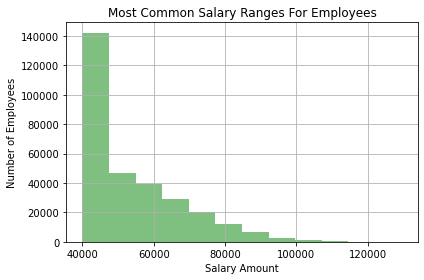

In [5]:
#creating bins
num_bins = 12
n, bins, patches = plt.hist(salary_col, num_bins, facecolor='green', alpha=0.5)

plt.xlabel('Salary Amount')
plt.ylabel('Number of Employees')
plt.title('Most Common Salary Ranges For Employees')
plt.grid()
plt.tight_layout()
plt.show()

# Create a bar chart of average salary by title.

In [6]:
with engine.connect() as connection:
    salaries_by_title_avg_df = pd.read_sql_table('salaries_by_title_avg',con=engine)
    print(salaries_by_title_avg_df.info())
    
salaries_by_title_avg_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7 non-null      object 
 1   salary_mean  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None


,title,salary_mean
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


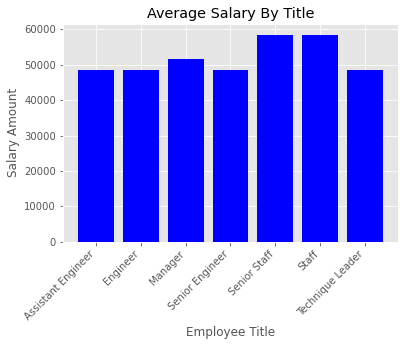

In [7]:
plt.style.use('ggplot')

x = salaries_by_title_avg_df['title']
y = salaries_by_title_avg_df['salary_mean']


plt.bar(x, y, color='blue')
plt.xlabel("Employee Title")
plt.ylabel("Salary Amount")
plt.title("Average Salary By Title")

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

# As you may see there are no big differences in salary among jobs that in real-world are different, i.e. Staff average salary is greater than Manager or Senior Engineer.

## Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [14]:
#
qry = "SELECT * FROM salaries WHERE salaries.emp_no = '499942';"
result = pd.read_sql_query(qry, engine)
print(result)

   emp_no   salary
0  499942  40000.0


## My salary is not 40,000 !!!